In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('math.csv')
df = df[df['dynamic'] == False]
df.drop(['dynamic'], axis=1, inplace=True)

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[df['busy'] == 0]

df

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,1.123015,0.071497,0.071475,0.999689,1.122666,15.707108
1,0,2,0.738903,0.035911,0.035814,0.997304,0.736911,20.575932
2,0,3,0.738986,0.035931,0.023892,0.664947,0.491386,20.566745
3,0,4,0.522863,0.018029,0.017934,0.994706,0.520095,29.001172
4,0,5,0.484649,0.014557,0.014387,0.988284,0.478971,33.292932
...,...,...,...,...,...,...,...,...
139,16,12,1.150164,0.030042,0.011999,0.399401,0.459377,38.285347
140,16,13,1.364467,0.036425,0.010916,0.299694,0.408922,37.459135
141,16,14,1.403207,0.037449,0.010158,0.271241,0.380607,37.469988
142,16,15,1.321252,0.035085,0.009486,0.270356,0.357209,37.658160


In [3]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup[df_speedup['busy'] == 0]

df_speedup

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,2,1.519840,1.990954,1.995715,1.002392,1.523475,0.763373
2,0,3,1.519669,1.989841,2.991552,1.503413,2.284690,0.763714
3,0,4,2.147817,3.965670,3.985537,1.005010,2.158577,0.541603
4,0,5,2.317173,4.911502,4.968181,1.011540,2.343913,0.471785
...,...,...,...,...,...,...,...,...
139,16,12,0.976395,2.379918,5.956860,2.502969,2.443886,0.410264
140,16,13,0.823042,1.962835,6.547432,3.335702,2.745424,0.419313
141,16,14,0.800320,1.909198,7.036567,3.685614,2.949670,0.419192
142,16,15,0.849962,2.037804,7.535142,3.697677,3.142886,0.417097


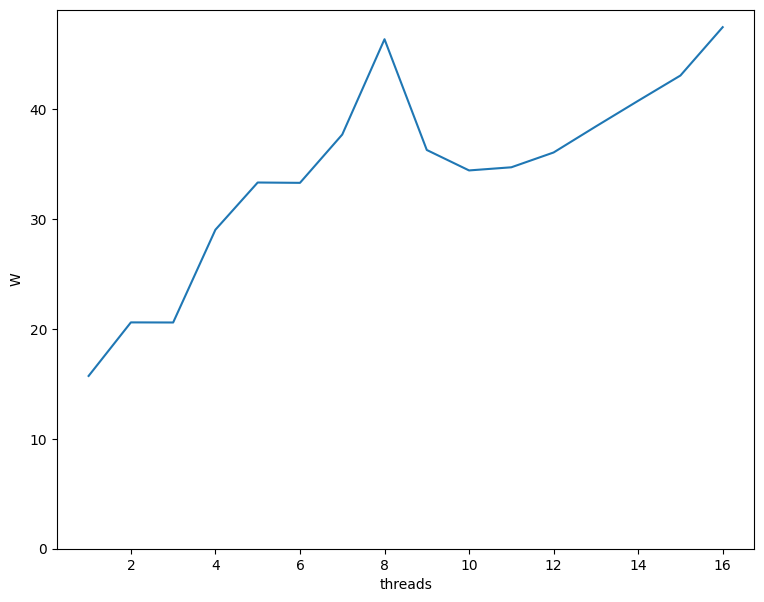

In [4]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

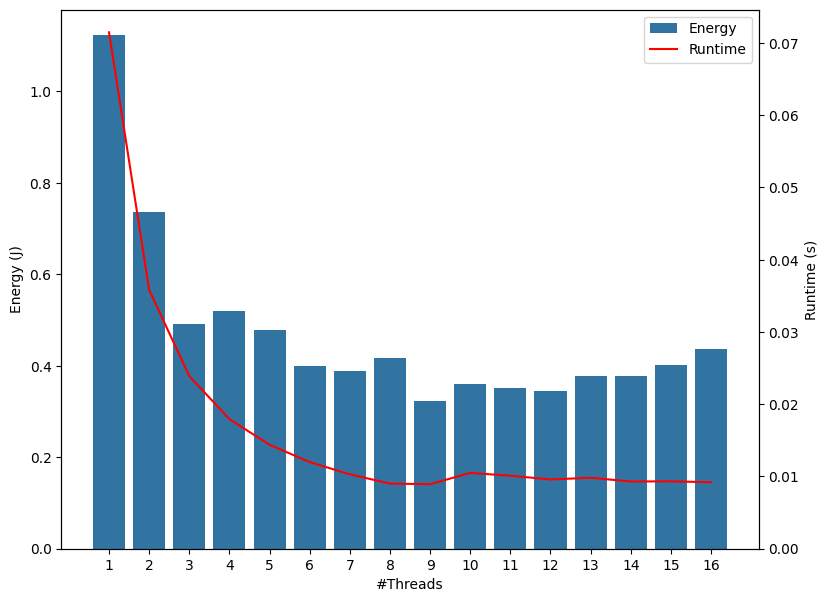

In [5]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

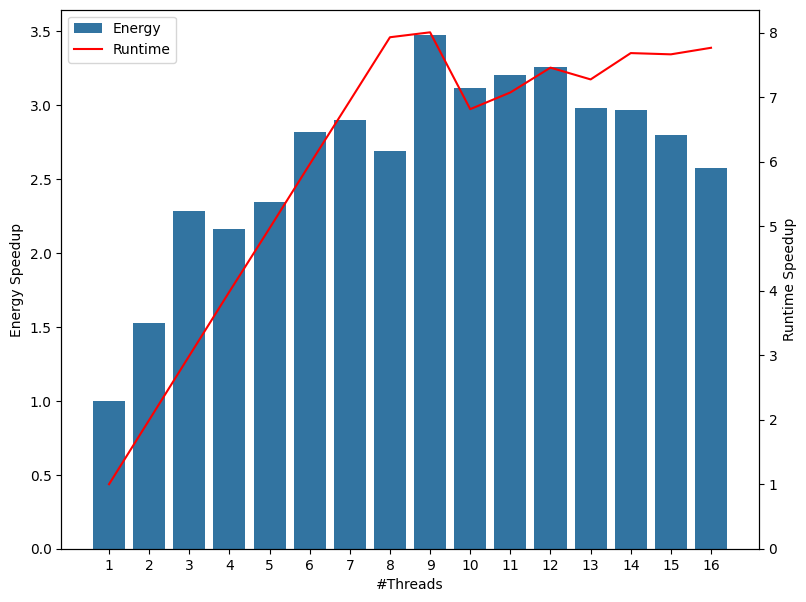

In [6]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

In [7]:
for (busy, df_busy) in df.groupby('busy'):
    best = df_busy[df_busy['energy'] == df_busy['energy'].min()].iloc[0]
    print(busy, '\t', int(best['threads']), '\t', best['energy'])

0 	 8 	 0.42065493
2 	 15 	 0.49224899
4 	 12 	 0.57537255
6 	 10 	 0.6395146
8 	 8 	 0.71456958
10 	 7 	 0.91036815
12 	 16 	 1.25286532
14 	 16 	 1.61308523
16 	 12 	 1.15016417


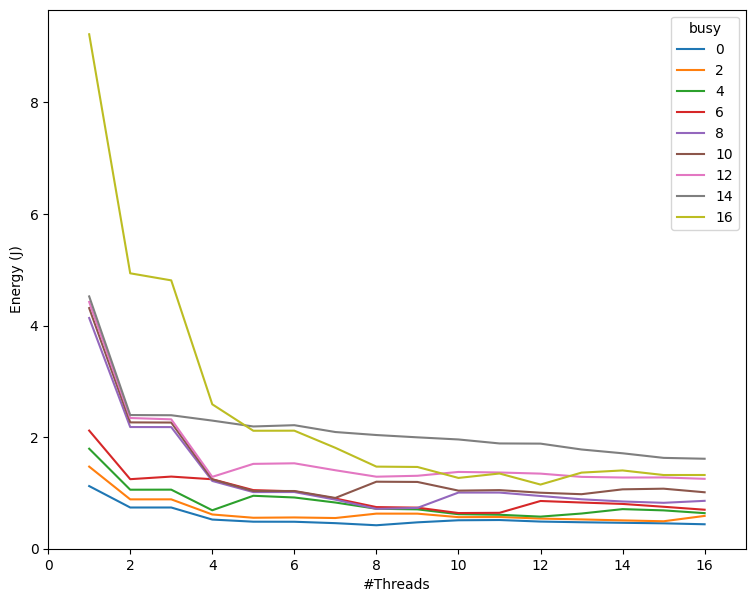

In [10]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 17))
ax.set_ylim((0, None))

plt.show()

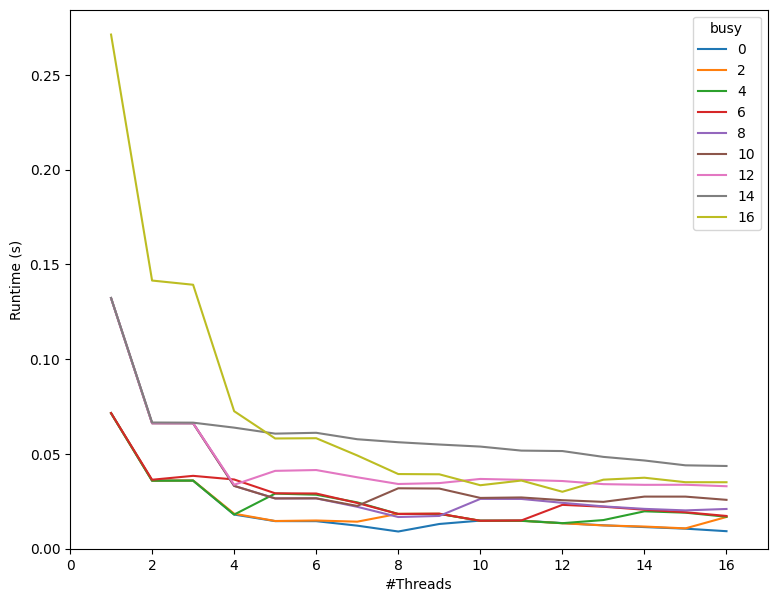

In [11]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 17))
ax.set_ylim((0, None))

plt.show()